# TASK 2:-PREDICT THE OPTIMUM NUMBER OF CLUSTERS FROM THE GIVEN 'IRIS' dataset.

Name - Dhanji Kumar Gupta

BATCH January2022

Data science and Business Analytics intern at The Spark foundation.

Language Used - python 3

IDE used - Anaconda Jupyter Notebook

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

loading dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Storing Values as an array

In [3]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

finding optimum Number of Clusters

In [5]:
WCSS=[]
for i in range (1,11):
    Kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    Kmeans.fit(x)
    WCSS.append(Kmeans.inertia_)

Plotting the results onto a line graph observing the elbow method

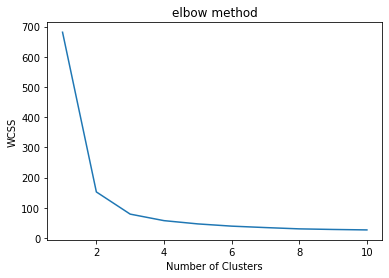

In [48]:
plt.plot(range(1,11),WCSS)
plt.title("elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") # Within clusters sum of square
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum
clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS)
doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'

Applying kmeans to the dataset / Creating the kmeans classifier.

In [6]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

Visualising the clusters - On the first two columns

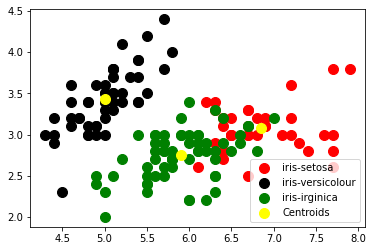

In [7]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="red",label="iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="black",label="iris-versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="green",label="iris-irginica")
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')#plotting the centroids of the clusters
plt.legend()